<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/PolyRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [9]:
X=6*np.random.rand(200,1)-3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

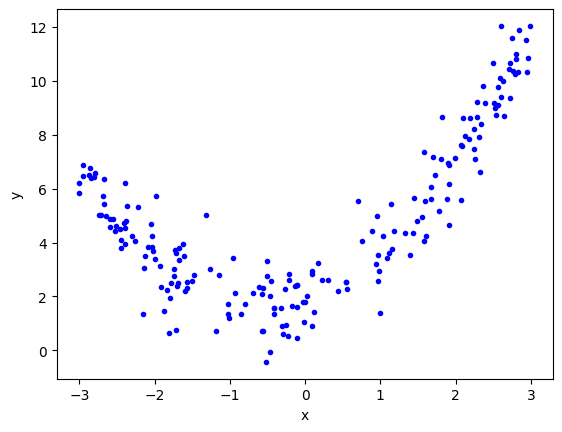

In [10]:
plt.plot(X,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
lr=LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
ypred=lr.predict(X_test)

In [17]:
print("r2 score",r2_score(y_test,ypred))

r2 score 0.08955713002491617


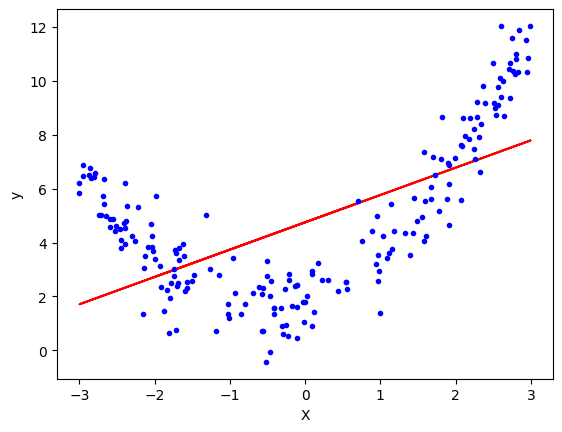

In [20]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [67]:
ploy=PolynomialFeatures(degree=2,include_bias=True)

In [68]:
X_train_trans = ploy.fit_transform(X_train)

In [69]:
X_test_trans=ploy.transform(X_test)

In [70]:
print(X_train[0])
print(X_train_trans[0])

[-2.02769906]
[ 1.         -2.02769906  4.1115635 ]


In [26]:
X_train_trans

array([[ 1.00000000e+00, -2.02769906e+00,  4.11156350e+00],
       [ 1.00000000e+00, -5.05046109e-01,  2.55071572e-01],
       [ 1.00000000e+00,  2.60754751e+00,  6.79930401e+00],
       [ 1.00000000e+00,  2.72392360e+00,  7.41975977e+00],
       [ 1.00000000e+00, -2.64799828e+00,  7.01189489e+00],
       [ 1.00000000e+00,  1.57675670e+00,  2.48616169e+00],
       [ 1.00000000e+00,  2.25436828e+00,  5.08217634e+00],
       [ 1.00000000e+00, -5.60813622e-01,  3.14511918e-01],
       [ 1.00000000e+00, -1.67331425e+00,  2.79998058e+00],
       [ 1.00000000e+00,  1.57428650e+00,  2.47837799e+00],
       [ 1.00000000e+00, -6.86145387e-01,  4.70795492e-01],
       [ 1.00000000e+00, -8.48061693e-01,  7.19208635e-01],
       [ 1.00000000e+00,  2.55607298e+00,  6.53350909e+00],
       [ 1.00000000e+00,  2.08306260e+00,  4.33914979e+00],
       [ 1.00000000e+00, -2.54839411e+00,  6.49431252e+00],
       [ 1.00000000e+00,  1.39640556e+00,  1.94994848e+00],
       [ 1.00000000e+00,  1.48530977e+00

In [71]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [72]:
y_pred = lr.predict(X_test_trans)

In [73]:
r2_score(y_test,y_pred)

0.9156121245914538

In [74]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.89103548 0.80444274]]
[2.01199711]


In [76]:
X_train_arranged=np.sort(X_train,axis=0)
X_train_poly=ploy.transform(X_train_arranged)

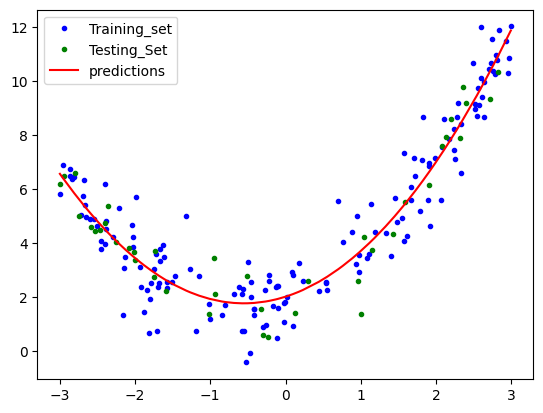

In [78]:
plt.plot(X_train,y_train,"b.",label='Training_set')
plt.plot(X_test,y_test,'g.',label='Testing_Set')
plt.plot(X_train_arranged,lr.predict(X_train_poly),'r-',label='predictions')
plt.legend()
plt.show()

In [82]:
def PolynomialRegression(degree):
  X_new=np.linspace(-3,3,100).reshape(100,1)

  poly_features=PolynomialFeatures(degree=degree,include_bias=True)
  std_scaler=StandardScaler()
  lin_reg=LinearRegression()
  poly_reg=Pipeline([
      ('poly_features',poly_features),
      ('std_scaler',std_scaler),
      ('lin_reg',lin_reg)
  ])
  poly_reg.fit(X,y)
  y_new=poly_reg.predict(X_new)
  plt.plot(X_new,y_new,'r-',label='Degree = '+str(degree))
  plt.plot(X_train, y_train, "b.", linewidth=3)
  plt.plot(X_test, y_test, "g.", linewidth=3)
  plt.legend(loc="upper left")
  plt.xlabel("X")
  plt.ylabel("y")
  plt.axis([-3, 3, 0, 10])
  plt.show()

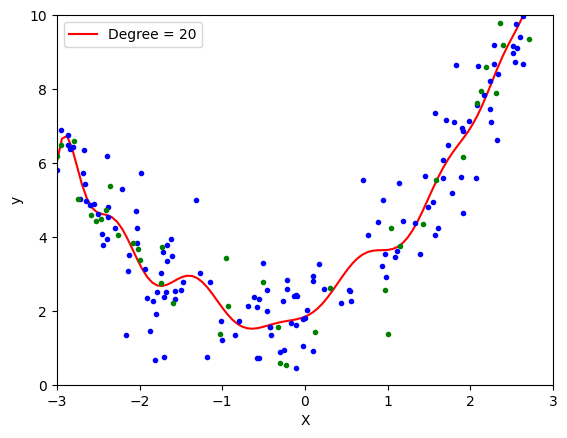

In [84]:
PolynomialRegression(20)